In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
analysis_gene_names = ['SLC1A2', 'SLC1A3', 'GPM6A']
genes = dict()
for gene_name in analysis_gene_names:
    genes['AD-'+gene_name] = pd.read_csv('tmp/related_genes_{}.csv'.format(gene_name))
    genes['AD-'+gene_name]['value'] /= genes['AD-'+gene_name]['value'].max()
    genes['AD-'+gene_name]['category'] = 'AD-' + gene_name

for gene_name in analysis_gene_names:
    genes['control-'+gene_name] = pd.read_csv('../related-genes/tmp/related_genes_{}.csv'.format(gene_name))
    genes['control-'+gene_name]['value'] /= genes['control-'+gene_name]['value'].max()
    genes['control-'+gene_name]['category'] = 'control-' + gene_name

genes = pd.concat(list(genes.values()))
genes

,index,value,name,category
0,12171,1.000000,LRP1B,AD-SLC1A2
1,16466,0.777019,ZBTB20,AD-SLC1A2
2,3904,0.728359,SLC1A2,AD-SLC1A2
3,11179,0.521147,NRG3,AD-SLC1A2
4,8600,0.467594,PRKCA,AD-SLC1A2
...,...,...,...,...
29115,10727,-0.109357,GRM3,control-GPM6A
29116,23067,-0.113639,MSI2,control-GPM6A
29117,14604,-0.121666,ABLIM1,control-GPM6A
29118,23665,-0.192606,DTNA,control-GPM6A


In [3]:
TF = pd.read_csv('/lmh_data/data/sclab/source/Homo_sapiens_TF', sep='\t', index_col=0)
TF_cofactors = pd.read_csv('/lmh_data/data/sclab/source/Homo_sapiens_TF_cofactors', sep='\t', index_col=0)
RBP = pd.read_csv('/lmh_data/data/sclab/source/Homo_sapiens_RBP', sep='\t', index_col=0, header=None)

In [4]:
TF, TF_cofactors, RBP = TF['Symbol'].unique(), TF_cofactors['Symbol'].unique(), RBP[1].unique()
gene_names = set(TF) | set(TF_cofactors) | set(RBP)

/tmp/ipykernel_278020/2793610716.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  _genes = _genes.loc[_gene_names]
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/seaborn/matrix.py:1221: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


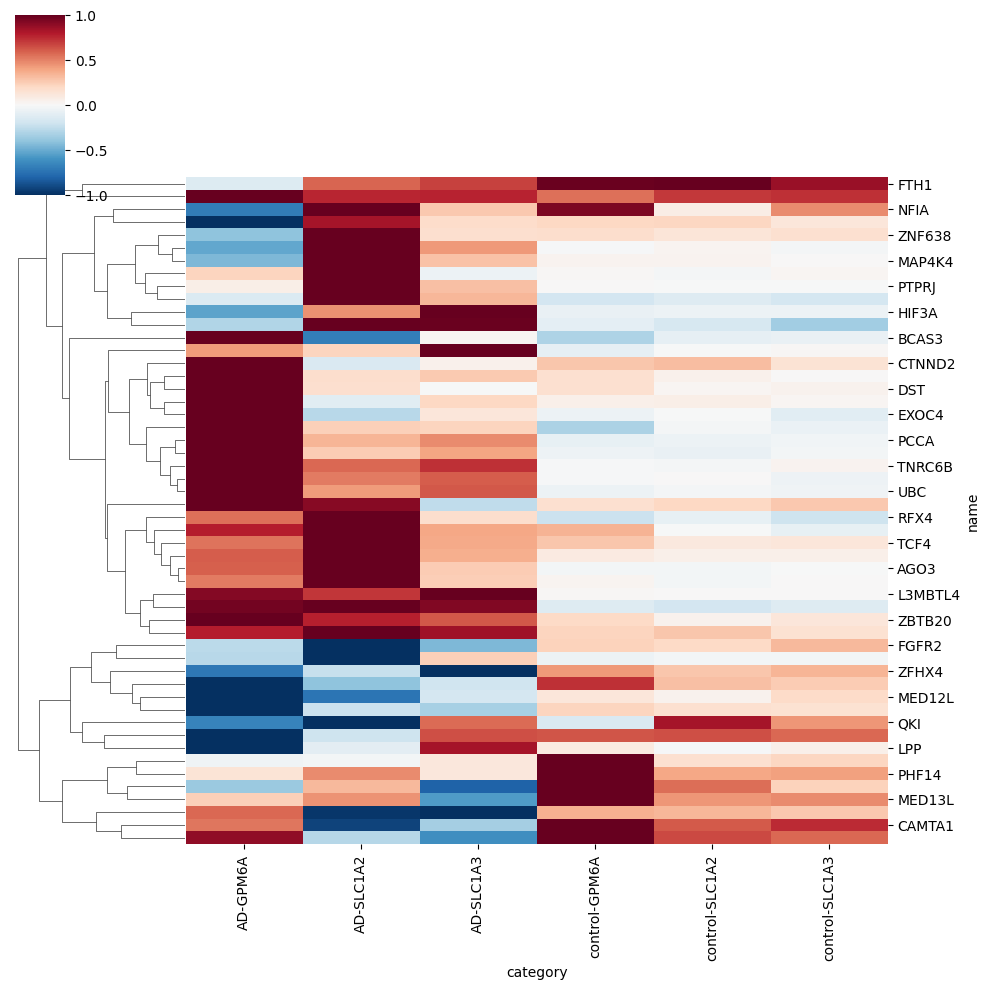

In [5]:
_genes = pd.pivot(genes[genes['name'].isin(gene_names)], index='name', columns='category', values='value')
_gene_names = set()
_columns = _genes.columns
for gene_name in _columns:
    _gene_names = _gene_names | set(_genes.nlargest(20, gene_name).index)
_genes = _genes.loc[_gene_names]
_genes = _genes.div(_genes.abs().max(axis=1), axis=0)

_genes = _genes[_columns]
sns.clustermap(data=_genes, square=True, cmap='RdBu_r', center=0, col_cluster=False)
plt.show()

In [6]:
_genes = pd.pivot(genes[genes['name'].isin(gene_names)], index='name', columns='category', values='value')
for gene_name in _columns:
    print('{}: {}'.format(gene_name, set(_genes.nlargest(20, gene_name).index)))

AD-GPM6A: {'RORA', 'GLIS3', 'ZBTB20', 'AUTS2', 'MEIS2', 'TNRC6B', 'SOX5', 'NPAS3', 'PCCA', 'TCF4', 'PTPRG', 'CTNND2', 'ESRRG', 'UBC', 'TRAK1', 'DST', 'EXOC4', 'BCAS3', 'L3MBTL4', 'CLU'}
AD-SLC1A2: {'MACF1', 'ZBTB20', 'AGO3', 'CIRBP', 'MEIS2', 'KMT2C', 'MAP4K4', 'SOX5', 'TCF4', 'PTPRG', 'PTPRJ', 'MAML2', 'ESRRG', 'DST', 'ZNF638', 'L3MBTL4', 'SMYD3', 'TAB2', 'RFX4', 'CLU'}
AD-SLC1A3: {'MACF1', 'RORA', 'PCGF5', 'ZBTB20', 'AUTS2', 'MEIS2', 'TNRC6B', 'ERBB4', 'SOX5', 'TNRC6A', 'TCF4', 'PTPRG', 'UBC', 'ESRRG', 'HIF3A', 'L3MBTL4', 'SMYD3', 'TAB2', 'CLU', 'LPP'}
control-GPM6A: {'RORA', 'NFIA', 'ZBTB20', 'PTK2', 'MEIS2', 'FTH1', 'ERBB4', 'NPAS3', 'HSPA1A', 'TCF4', 'PTPRG', 'ZFHX4', 'CTNND2', 'MED13L', 'N4BP2L2', 'PHF14', 'DST', 'NFIB', 'MAPK10', 'CLU'}
control-SLC1A2: {'RORA', 'ZBTB20', 'AUTS2', 'PTK2', 'MEIS2', 'FTH1', 'ERBB4', 'NPAS3', 'CAMTA1', 'HSPA1A', 'TCF4', 'PTPRG', 'ZFHX4', 'ZHX3', 'CTNND2', 'N4BP2L2', 'DST', 'NFIB', 'QKI', 'MAPK10'}
control-SLC1A3: {'NFIA', 'ZBTB20', 'MED12L', 'TJP1',